In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
# Create Zip of the combinations and pack them up
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list (unpacking into a list)
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple function to display the lat and long combinations
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
        citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

saint-philippe re
provideniya ru
busselton au
saint george bm
turukhansk ru
lebu cl
rikitea pf
el alto pe
tual id
mys shmidta ru
ushuaia ar
luderitz na
vao nc
umm jarr sd
qaanaaq gl
cockburn town bs
butaritari ki
powell us
rikitea pf
burica pa
ambositra mg
grindavik is
bluff nz
rikitea pf
nikolskoye ru
chuy uy
pavlogradka ru
peniche pt
kapaa us
kapaa us
makueni ke
mariental na
bykivka ua
dikson ru
medicine hat ca
atasu kz
taolanaro mg
antalaha mg
predivinsk ru
menongue ao
rognan no
cabo san lucas mx
am timan td
ilulissat gl
iqaluit ca
tabou ci
ondjiva ao
makakilo city us
tsihombe mg
carnarvon au
qaanaaq gl
sentyabrskiy ru
taolanaro mg
maceio br
victoria sc
tsihombe mg
barawe so
bolungarvik is
busselton au
chabahar ir
rongcheng cn
mahebourg mu
port alfred za
bissora gw
namibe ao
port alfred za
tibati cm
brae gb
east london za
hilo us
jamestown sh
puerto ayora ec
busselton au
hilo us
yellowknife ca
chokurdakh ru
ghanzi bw
bratsk ru
gladstone au
puerto ayora ec
burns lake ca
yar-sale ru
s

cape town za
albany au
saint-augustin ca
hobart au
sistranda no
rikitea pf
butaritari ki
williams lake ca
darnah ly
pierre us
qaanaaq gl
esperance au
lebu cl
mildura au
lebu cl
manta ec
bredasdorp za
butaritari ki
taltal cl
punta arenas cl
hobart au
karlstad se
illoqqortoormiut gl
cabo san lucas mx
klaksvik fo
machilipatnam in
lovozero ru
sitka us
norman wells ca
aanekoski fi
longyearbyen sj
ankang cn
ushuaia ar
lebu cl
ahipara nz
khatanga ru
mineros bo
constitucion mx
mataura pf
barrow us
vaini to
kosa ru
siguiri gn
rungata ki
ushuaia ar
ushuaia ar
kapaa us
dunedin nz
carnarvon au
illoqqortoormiut gl
rikitea pf
shimoda jp
port alfred za
agapovka ru
teseney er
divnogorsk ru
hasaki jp
tuktoyaktuk ca
saint-philippe re
dikson ru
bengkulu id
ushuaia ar
mataura pf
mahebourg mu
qaanaaq gl
taolanaro mg
banjar id
key largo us
karatuzskoye ru
susuman ru
chokurdakh ru
vaitupu wf
nizhneyansk ru
saskylakh ru
port elizabeth za
nogliki ru
rikitea pf
macusani pe
iqaluit ca
rikitea pf
rikitea pf
romit

vaitupu wf
svetlogorsk ru
kodiak us
rikitea pf
albany au
busselton au
vaini to
rikitea pf
avarua ck
kodiak us
coquimbo cl
guerrero negro mx
yellowknife ca
barrow us
andalan ph
illoqqortoormiut gl
bellevue us
ushuaia ar
mataura pf
kapaa us
maumere id
nabire id
lahat id
illoqqortoormiut gl
esperance au
atuona pf
bluff nz
matay eg
butaritari ki
rybnaya sloboda ru
ushuaia ar
mataura pf
wenling cn
biltine td
illoqqortoormiut gl
pevek ru
ponta do sol pt
bethel us
burgersdorp za
hermanus za
port hedland au
pala td
mount isa au
ponta do sol cv
albany au
barrow us
nikolskoye ru
upata ve
mar del plata ar
lufilufi ws
burnie au
chokurdakh ru
bluff nz
neiafu to
mataura pf
jamestown sh
nevyansk ru
saint-philippe re
ushuaia ar
jiuquan cn


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each lat and long combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)


612

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + "aa8fddac199613166992d295efd57e02"
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aa8fddac199613166992d295efd57e02


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-philippe
Processing Record 2 of Set 1 | provideniya
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | saint george
Processing Record 5 of Set 1 | turukhansk
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | el alto
Processing Record 9 of Set 1 | tual
Processing Record 10 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | luderitz
Processing Record 13 of Set 1 | vao
Processing Record 14 of Set 1 | umm jarr
City not found. Skipping...
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | cockburn town
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | powell
Processing Record 19 of Set 1 | burica
City not found. Skipping...
Processing Record 20 of Set 1 | ambositra
Processing Record 21 of Set 1 | grindav

Processing Record 33 of Set 4 | pangnirtung
Processing Record 34 of Set 4 | lambarene
Processing Record 35 of Set 4 | myslenice
Processing Record 36 of Set 4 | sawakin
Processing Record 37 of Set 4 | roma
Processing Record 38 of Set 4 | saldanha
Processing Record 39 of Set 4 | nuqui
Processing Record 40 of Set 4 | la ronge
Processing Record 41 of Set 4 | caravelas
Processing Record 42 of Set 4 | minnedosa
Processing Record 43 of Set 4 | mehamn
Processing Record 44 of Set 4 | burkhala
City not found. Skipping...
Processing Record 45 of Set 4 | dicabisagan
Processing Record 46 of Set 4 | kibiti
Processing Record 47 of Set 4 | gat
Processing Record 48 of Set 4 | oranjestad
Processing Record 49 of Set 4 | kautokeino
Processing Record 50 of Set 4 | shache
Processing Record 1 of Set 5 | bondo
Processing Record 2 of Set 5 | polyarnyye zori
Processing Record 3 of Set 5 | tel aviv-yafo
Processing Record 4 of Set 5 | donskoye
Processing Record 5 of Set 5 | san patricio
Processing Record 6 of Set

Processing Record 27 of Set 8 | marolambo
Processing Record 28 of Set 8 | cotonou
Processing Record 29 of Set 8 | guaratinga
Processing Record 30 of Set 8 | hithadhoo
Processing Record 31 of Set 8 | mpongwe
Processing Record 32 of Set 8 | luena
Processing Record 33 of Set 8 | nizwa
Processing Record 34 of Set 8 | ponta do sol
Processing Record 35 of Set 8 | bonnyville
Processing Record 36 of Set 8 | nouakchott
Processing Record 37 of Set 8 | togur
Processing Record 38 of Set 8 | baracoa
Processing Record 39 of Set 8 | faanui
Processing Record 40 of Set 8 | maragogi
Processing Record 41 of Set 8 | iwaki
Processing Record 42 of Set 8 | tasiilaq
Processing Record 43 of Set 8 | itoman
Processing Record 44 of Set 8 | shingu
Processing Record 45 of Set 8 | berlevag
Processing Record 46 of Set 8 | nushki
Processing Record 47 of Set 8 | stornoway
Processing Record 48 of Set 8 | ambon
Processing Record 49 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 50 of Set 8 | batem

Processing Record 18 of Set 12 | kyra
Processing Record 19 of Set 12 | abilene
Processing Record 20 of Set 12 | bari
Processing Record 21 of Set 12 | two hills
Processing Record 22 of Set 12 | satitoa
City not found. Skipping...
Processing Record 23 of Set 12 | atambua
Processing Record 24 of Set 12 | subang
Processing Record 25 of Set 12 | inhambane
Processing Record 26 of Set 12 | tilichiki
Processing Record 27 of Set 12 | lata
Processing Record 28 of Set 12 | hailin
Processing Record 29 of Set 12 | hambantota
Processing Record 30 of Set 12 | la cruz
Processing Record 31 of Set 12 | cerritos
Processing Record 32 of Set 12 | requena
Processing Record 33 of Set 12 | boyuibe
Processing Record 34 of Set 12 | eldorado
Processing Record 35 of Set 12 | tocopilla
Processing Record 36 of Set 12 | jumla
Processing Record 37 of Set 12 | port-gentil
Processing Record 38 of Set 12 | baglung
Processing Record 39 of Set 12 | alenquer
Processing Record 40 of Set 12 | hendaye
Processing Record 41 of 

In [11]:
len(city_data)

569

In [12]:
city_data

[{'City': 'Saint-Philippe',
  'Lat': -21.3585,
  'Lng': 55.7679,
  'Max Temp': 65.79,
  'Humidity': 83,
  'Cloudiness': 87,
  'Wind Speed': 9.89,
  'Country': 'RE',
  'Date': '2021-07-27 04:02:54'},
 {'City': 'Provideniya',
  'Lat': 64.3833,
  'Lng': -173.3,
  'Max Temp': 50.11,
  'Humidity': 81,
  'Cloudiness': 90,
  'Wind Speed': 8.95,
  'Country': 'RU',
  'Date': '2021-07-27 04:02:54'},
 {'City': 'Busselton',
  'Lat': -33.65,
  'Lng': 115.3333,
  'Max Temp': 58.05,
  'Humidity': 56,
  'Cloudiness': 95,
  'Wind Speed': 23.69,
  'Country': 'AU',
  'Date': '2021-07-27 04:02:55'},
 {'City': 'Saint George',
  'Lat': 37.1041,
  'Lng': -113.5841,
  'Max Temp': 76.62,
  'Humidity': 79,
  'Cloudiness': 20,
  'Wind Speed': 3.44,
  'Country': 'US',
  'Date': '2021-07-27 04:02:02'},
 {'City': 'Turukhansk',
  'Lat': 65.8167,
  'Lng': 87.9833,
  'Max Temp': 82.11,
  'Humidity': 44,
  'Cloudiness': 54,
  'Wind Speed': 19.64,
  'Country': 'RU',
  'Date': '2021-07-27 04:02:55'},
 {'City': 'Lebu',
  

In [13]:
# Convert the array of dictionaries to a Pandas DF.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Philippe,-21.3585,55.7679,65.79,83,87,9.89,RE,2021-07-27 04:02:54
1,Provideniya,64.3833,-173.3000,50.11,81,90,8.95,RU,2021-07-27 04:02:54
2,Busselton,-33.6500,115.3333,58.05,56,95,23.69,AU,2021-07-27 04:02:55
3,Saint George,37.1041,-113.5841,76.62,79,20,3.44,US,2021-07-27 04:02:02
4,Turukhansk,65.8167,87.9833,82.11,44,54,19.64,RU,2021-07-27 04:02:55
5,Lebu,-37.6167,-73.6500,45.00,79,60,17.54,CL,2021-07-27 04:02:56
6,Rikitea,-23.1203,-134.9692,74.91,79,99,18.63,PF,2021-07-27 04:02:56
7,El Alto,-4.2714,-81.2147,67.06,83,69,12.08,PE,2021-07-27 04:02:56
8,Tual,-5.6667,132.7500,81.63,77,62,17.27,ID,2021-07-27 04:02:57
9,Ushuaia,-54.8000,-68.3000,31.57,93,97,4.74,AR,2021-07-27 04:02:57


In [14]:
# Creating new Column order and assigning the previous DF to that new order
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Philippe,RE,2021-07-27 04:02:54,-21.3585,55.7679,65.79,83,87,9.89
1,Provideniya,RU,2021-07-27 04:02:54,64.3833,-173.3000,50.11,81,90,8.95
2,Busselton,AU,2021-07-27 04:02:55,-33.6500,115.3333,58.05,56,95,23.69
3,Saint George,US,2021-07-27 04:02:02,37.1041,-113.5841,76.62,79,20,3.44
4,Turukhansk,RU,2021-07-27 04:02:55,65.8167,87.9833,82.11,44,54,19.64
5,Lebu,CL,2021-07-27 04:02:56,-37.6167,-73.6500,45.00,79,60,17.54
6,Rikitea,PF,2021-07-27 04:02:56,-23.1203,-134.9692,74.91,79,99,18.63
7,El Alto,PE,2021-07-27 04:02:56,-4.2714,-81.2147,67.06,83,69,12.08
8,Tual,ID,2021-07-27 04:02:57,-5.6667,132.7500,81.63,77,62,17.27
9,Ushuaia,AR,2021-07-27 04:02:57,-54.8000,-68.3000,31.57,93,97,4.74


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


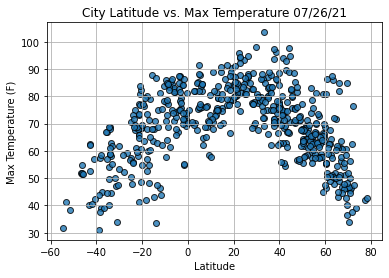

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

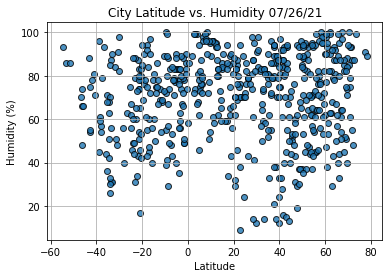

In [19]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

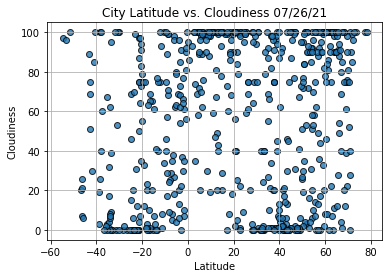

In [20]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

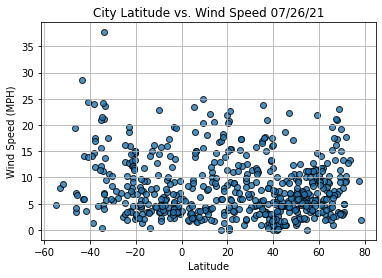

In [21]:
# Build the scatter plot for latitude vs. windspeed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [36]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Philippe,RE,2021-07-27 04:02:54,-21.3585,55.7679,65.79,83,87,9.89
1,Provideniya,RU,2021-07-27 04:02:54,64.3833,-173.3000,50.11,81,90,8.95
2,Busselton,AU,2021-07-27 04:02:55,-33.6500,115.3333,58.05,56,95,23.69
3,Saint George,US,2021-07-27 04:02:02,37.1041,-113.5841,76.62,79,20,3.44
4,Turukhansk,RU,2021-07-27 04:02:55,65.8167,87.9833,82.11,44,54,19.64
5,Lebu,CL,2021-07-27 04:02:56,-37.6167,-73.6500,45.00,79,60,17.54
6,Rikitea,PF,2021-07-27 04:02:56,-23.1203,-134.9692,74.91,79,99,18.63
7,El Alto,PE,2021-07-27 04:02:56,-4.2714,-81.2147,67.06,83,69,12.08
8,Tual,ID,2021-07-27 04:02:57,-5.6667,132.7500,81.63,77,62,17.27
9,Ushuaia,AR,2021-07-27 04:02:57,-54.8000,-68.3000,31.57,93,97,4.74


In [29]:
# Create Northern and Southern Hemisphere DFs.
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

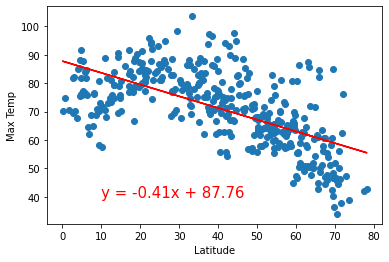

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


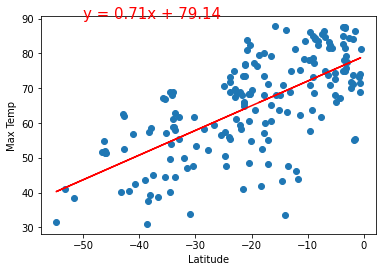

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere for Maximum Temperature", "Max Temp",(-50,90))

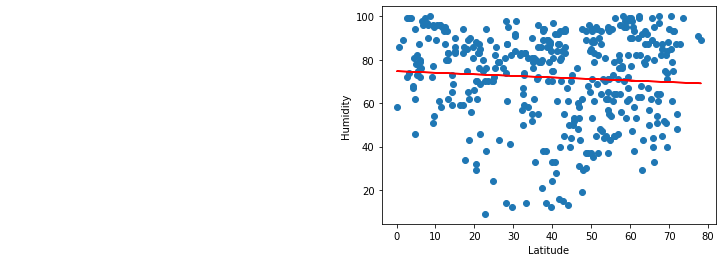

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Humidity', 'Humidity',(-100,15))

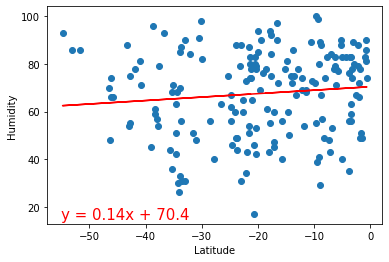

In [63]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Humidity', 'Humidity',(-55,15))


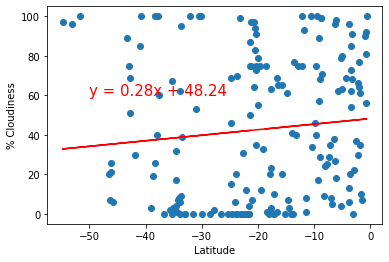

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

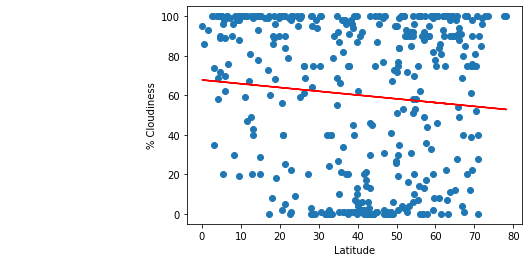

In [66]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

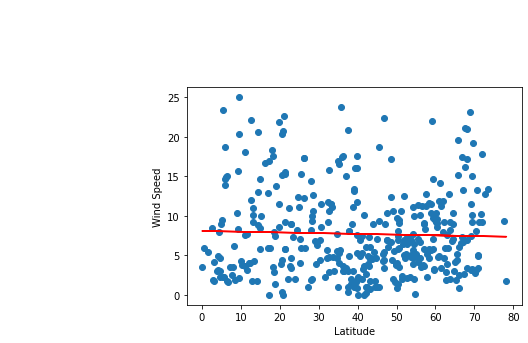

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

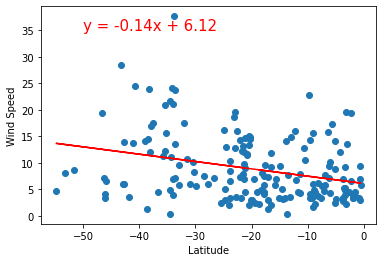

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))